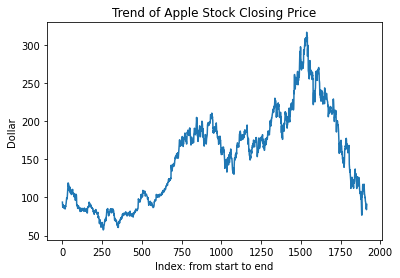

<class 'list'>
384
384
0
ARIMA - > Testing Mean Squared Error: 33.633
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1914
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5294.099
Method:                       css-mle   S.D. of innovations              3.846
Date:                Sat, 30 Apr 2022   AIC                          10602.199
Time:                        03:18:03   BIC                          10641.097
Sample:                             1   HQIC                         10616.513
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0029      0.084     -0.035      0.972      -0.167       0.162
ar.L1.D.y     -0.0255      0.023     -1.114      0.265      -

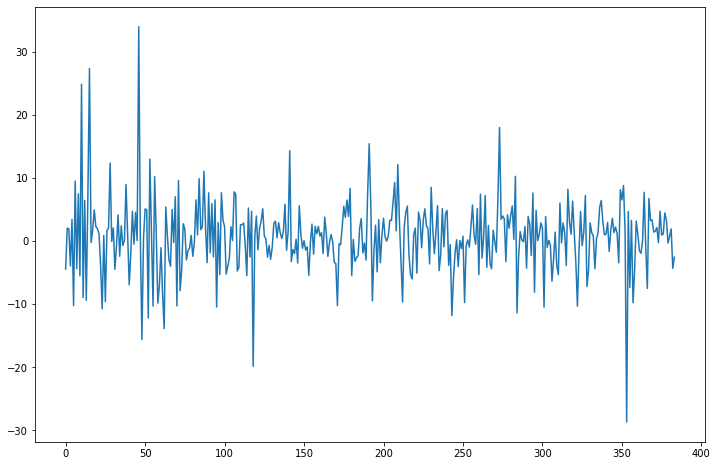

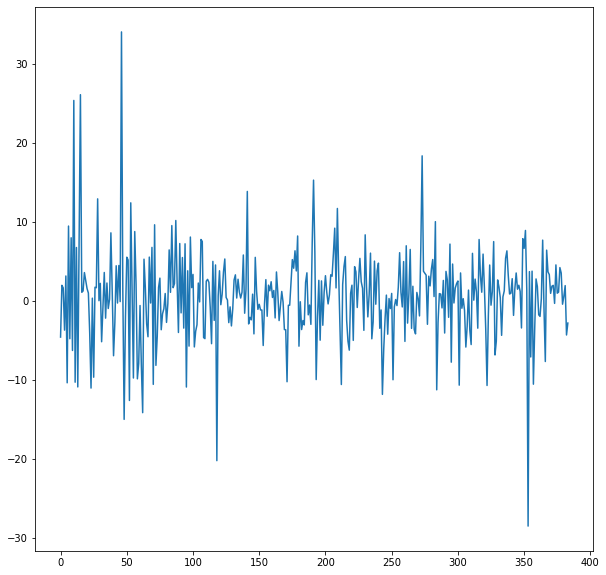

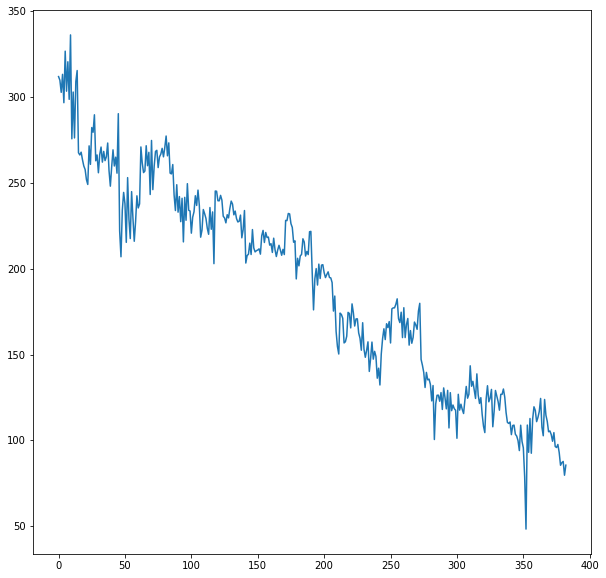

In [2]:
#ARIMA
import pandas as pd 
import numpy as np
import numpy
import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import BatchNormalization, LeakyReLU
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv('BABA.csv')

data['Close'].plot(label = 'Apple Stock Closing Price')
plt.title('Trend of Apple Stock Closing Price')
plt.xlabel("Index: from start to end")
plt.ylabel("Dollar")
plt.show()

data.isnull()


from pandas.plotting import lag_plot
#plt.figure(figsize=(10,10))
#lag_plot(data['Close'], lag=1)
#plt.title('Apple Autocorrelation plot')

from pandas.plotting import lag_plot
#plt.figure(figsize=(10,10))
#lag_plot((data['Close']-data['Close'].shift(1)), lag=1)
#plt.title('Apple Autocorrelation plot')

train_data,test_data = data[0:int(len(data)*0.8)],data[int(len(data)*0.8):]

#plt.figure(figsize=(10,7))
#plt.plot(train_data['Close'],'blue',label='Training Data')
#plt.plot(test_data['Close'],'red',label='Testing Data')

from statsmodels.tsa.arima_model import ARIMA

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()

for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)


diff = []
print(len(test_ar))
print(len(predictions))
print(len(diff))
for i in range(0,len(test_ar)):
  diff.append(predictions[i].item() - test_ar[i])


plt.figure(figsize=(12,8))
plt.plot(diff)

from sklearn.metrics import mean_squared_error
error = mean_squared_error(test_ar, predictions)
print('ARIMA - > Testing Mean Squared Error: %.3f' % error)

print(model_fit.summary())


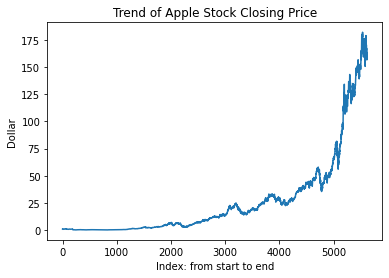

<class 'list'>


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

1124
1124


NameError: ignored

In [2]:
#SARIMA
import pandas as pd 
import numpy as np
import numpy
import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import BatchNormalization, LeakyReLU
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv('/content/AAPL (2).csv')

data['Close'].plot(label = 'Apple Stock Closing Price')
plt.title('Trend of Apple Stock Closing Price')
plt.xlabel("Index: from start to end")
plt.ylabel("Dollar")
plt.show()

data.isnull()


from pandas.plotting import lag_plot
#plt.figure(figsize=(10,10))
#lag_plot(data['Close'], lag=1)
#plt.title('Apple Autocorrelation plot')

from pandas.plotting import lag_plot
#plt.figure(figsize=(10,10))
#lag_plot((data['Close']-data['Close'].shift(1)), lag=1)
#plt.title('Apple Autocorrelation plot')

train_data,test_data = data[0:int(len(data)*0.8)],data[int(len(data)*0.8):]


from statsmodels.tsa.statespace.sarimax import SARIMAX

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()

for t in range(len(test_ar)):
    model = SARIMAX(history, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    # print(output[0])
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)


diff2 = []
print(len(test_ar))
print(len(predictions))
for i in range(0,len(test_ar)):
  diff2.append(predictions[i].item() - test_ar[i])
print(len(diff2))

plt.figure(figsize=(10,10))
plt.plot(diff2)


from sklearn.metrics import mean_squared_error
error = mean_squared_error(test_ar,predictions)
print('SARIMAX -> MSE is:',error)

print(model_fit.summary())



1124
1124
1124


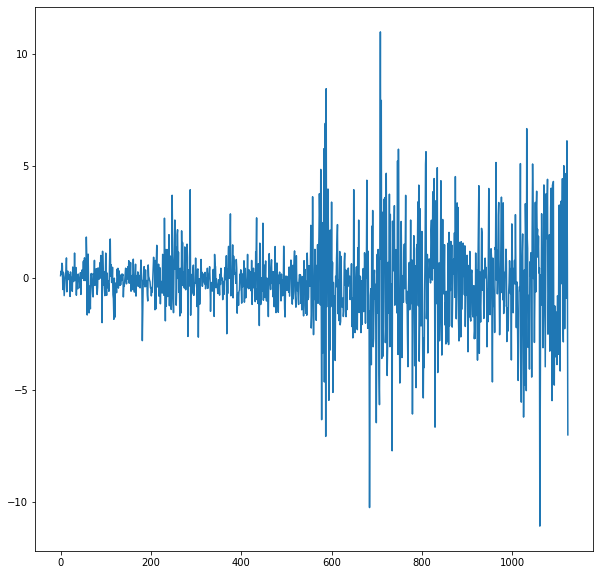

In [3]:
diff2 = []
print(len(test_ar))
print(len(predictions))
# print(len(diff))
for i in range(0,len(test_ar)):
  diff2.append(predictions[i].item() - test_ar[i])
print(len(diff2))

plt.figure(figsize=(10,10))
plt.plot(diff2)

<class 'list'>


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1123
1123
MOVING AVERAGE -> MSE is: 3.715785584821788
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 5615
Model:                     ARMA(0, 2)   Log Likelihood               -7237.280
Method:                       css-mle   S.D. of innovations              0.878
Date:                Sat, 30 Apr 2022   AIC                          14482.560
Time:                        04:37:42   BIC                          14509.093
Sample:                             0   HQIC                         14491.805
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0277      0.011      2.473      0.013       0.006       0.050
ma.L1.y       -0.0414      0.013     -3.102      0.002      -0.068      -0.01

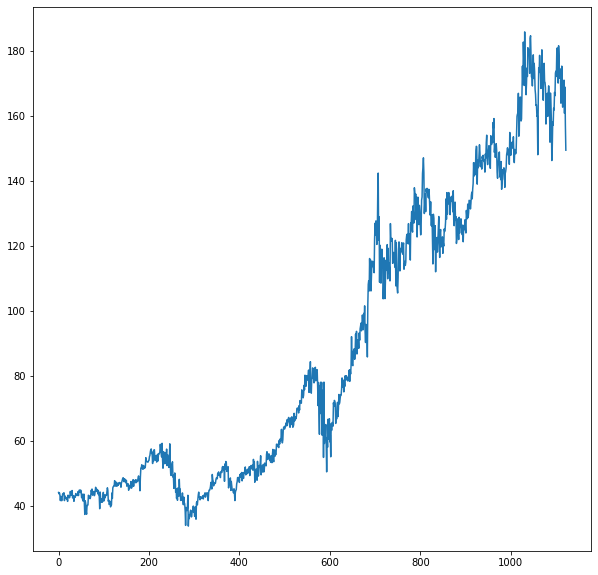

In [4]:
#MOVING AVERAGE
data_ar = data['Close'].values

def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

data_ar_stationary = difference(data_ar,1)
train_data,test_data = data_ar_stationary[0:int(len(data)*0.8)],data_ar_stationary[int(len(data)*0.8):]

train_ar = train_data.values
test_ar = test_data.values

from statsmodels.tsa.arima_model import ARMA

history = [x for x in train_ar]
print(type(history))
predictions = list()

for t in range(len(test_ar)):
        model = ARMA(history, order=(0,2))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        yhat = inverse_difference(data_ar, yhat, len(test_data)+1-t)
        predictions.append(yhat)
        obs = test_ar[t]
        history.append(obs)


diff3 = []
print(len(test_ar))
print(len(predictions))
# print(len(diff))
for i in range(0,len(test_ar)):
  diff3.append(predictions[i].item() - test_ar[i])

plt.figure(figsize=(10,10))
plt.plot(diff3)
from sklearn.metrics import mean_squared_error
error = mean_squared_error(data_ar[int(len(data)*0.8)+1:],predictions)
print('MOVING AVERAGE -> MSE is:',error)

print(model_fit.summary())